
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


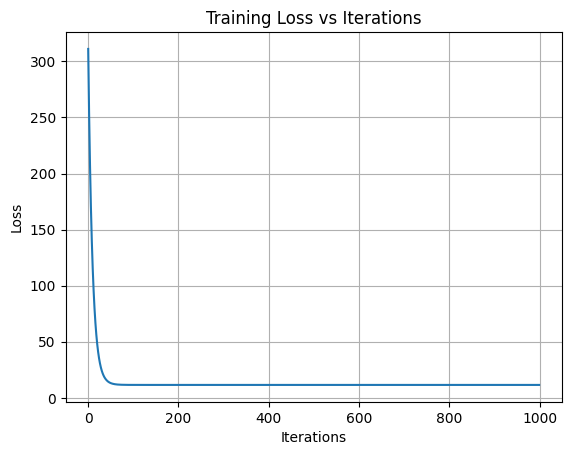

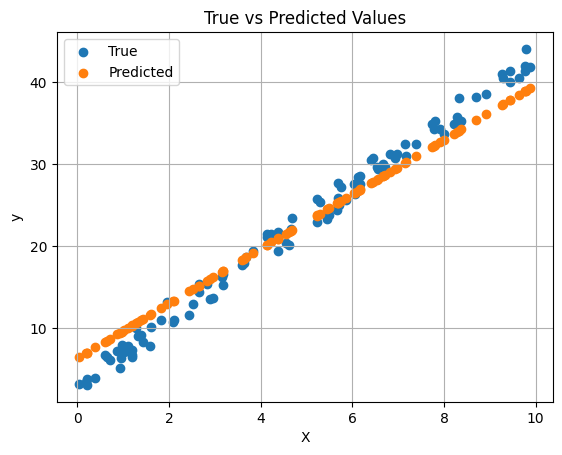

In [1]:
import numpy as np

class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std[self.std == 0] = 1.0

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            y_hat = X @ self.w + self.b
            error = y_hat - y

            dw = (1 / n) * (X.T @ error)
            db = (1 / n) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db

            loss = (1 / (2 * n)) * np.sum(error ** 2)
            self.losses.append(loss)

    def predict(self, X):
        return X @ self.w + self.b
class RidgeRegressionGD:
    def __init__(self, lr=0.01, epochs=1000, lam=0.1):
        self.lr = lr
        self.epochs = epochs
        self.lam = lam

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            y_hat = X @ self.w + self.b
            error = y_hat - y

            dw = (1 / n) * (X.T @ error) + 2 * self.lam * self.w
            db = (1 / n) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db

            loss = (1 / (2 * n)) * np.sum(error ** 2) + self.lam * np.sum(self.w ** 2)
            self.losses.append(loss)

    def predict(self, X):
        return X @ self.w + self.b
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 4 * X[:, 0] + 3 + np.random.randn(100)

scaler = StandardScalerManual()
X_std = scaler.fit_transform(X)

model = RidgeRegressionGD(lr=0.05, epochs=1000, lam=0.1)
model.fit(X_std, y)

y_pred = model.predict(X_std)
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss vs Iterations")
plt.grid()
plt.show()
plt.figure()
plt.scatter(X, y, label="True")
plt.scatter(X, y_pred, label="Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("True vs Predicted Values")
plt.grid()
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


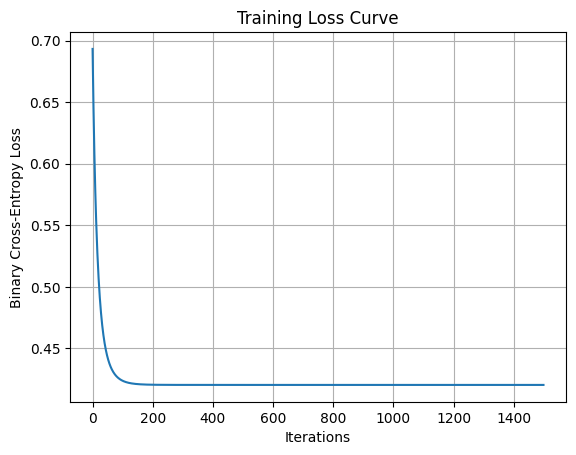

np.float64(0.94)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std[self.std == 0] = 1.0

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))
class LogisticRegressionGD:
    def __init__(self, lr=0.01, epochs=1000, lam=0.1):
        self.lr = lr
        self.epochs = epochs
        self.lam = lam

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            z = X @ self.w + self.b
            y_hat = sigmoid(z)

            error = y_hat - y

            dw = (1 / n) * (X.T @ error) + 2 * self.lam * self.w
            db = (1 / n) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db

            loss = (
                -np.mean(
                    y * np.log(y_hat + 1e-8) +
                    (1 - y) * np.log(1 - y_hat + 1e-8)
                )
                + self.lam * np.sum(self.w ** 2)
            )

            self.losses.append(loss)

    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)
np.random.seed(1)

n = 200
X = np.random.randn(n, 2)

true_w = np.array([2.0, -3.0])
true_b = 0.5

logits = X @ true_w + true_b
probs = sigmoid(logits)

y = (probs >= 0.5).astype(int)
scaler = StandardScalerManual()
X_std = scaler.fit_transform(X)

model = LogisticRegressionGD(lr=0.1, epochs=1500, lam=0.05)
model.fit(X_std, y)

plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.grid()
plt.show()
y_pred = model.predict(X_std)
accuracy = np.mean(y_pred == y)

accuracy



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [3]:
import numpy as np

def initialize_centroids(M, k):
    flat = M.flatten()
    indices = np.random.choice(len(flat), k, replace=False)
    return flat[indices].astype(float)


def assign_clusters(M, centroids):
    n, m = M.shape
    assignment = np.zeros((n, m), dtype=int)

    for i in range(n):
        for j in range(m):
            distances = np.abs(M[i, j] - centroids)
            assignment[i, j] = np.argmin(distances)

    return assignment


def update_centroids(M, assignment, k):
    centroids = np.zeros(k)

    for cluster_id in range(k):
        elements = M[assignment == cluster_id]
        if len(elements) == 0:
            centroids[cluster_id] = 0.0
        else:
            centroids[cluster_id] = np.mean(elements)

    return centroids


def has_converged(old, new, tol=1e-6):
    return np.all(np.abs(old - new) < tol)


def kmeans_matrix(M, k, max_iters=100):
    centroids = initialize_centroids(M, k)

    for _ in range(max_iters):
        assignment = assign_clusters(M, centroids)
        new_centroids = update_centroids(M, assignment, k)

        if has_converged(centroids, new_centroids):
            break

        centroids = new_centroids

    return assignment, centroids


def build_cookbook(assignment):
    cookbook = {}
    n, m = assignment.shape

    for i in range(n):
        for j in range(m):
            cluster = assignment[i, j]
            if cluster not in cookbook:
                cookbook[cluster] = []
            cookbook[cluster].append((i, j))

    return cookbook

np.random.seed(2)

M = np.random.randint(0, 100, size=(6, 6))
k = 3


assignment_table, centroids = kmeans_matrix(M, k)
cookbook = build_cookbook(assignment_table)


print("Input Matrix M:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)
print("\nCookbook (cluster_id : list of (i, j)):\n", cookbook)


Input Matrix M:
 [[40 15 72 22 43 82]
 [75  7 34 49 95 75]
 [85 47 63 31 90 20]
 [37 39 67  4 42 51]
 [38 33 58 67 69 88]
 [68 46 70 95 83 31]]

Assignment Table:
 [[1 0 2 0 1 2]
 [2 0 1 1 2 2]
 [2 1 2 1 2 0]
 [1 1 2 0 1 1]
 [1 1 1 2 2 2]
 [2 1 2 2 2 1]]

Centroids:
 [13.6        41.26666667 77.75      ]

Cookbook (cluster_id : list of (i, j)):
 {np.int64(1): [(0, 0), (0, 4), (1, 2), (1, 3), (2, 1), (2, 3), (3, 0), (3, 1), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (5, 1), (5, 5)], np.int64(0): [(0, 1), (0, 3), (1, 1), (2, 5), (3, 3)], np.int64(2): [(0, 2), (0, 5), (1, 0), (1, 4), (1, 5), (2, 0), (2, 2), (2, 4), (3, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 2), (5, 3), (5, 4)]}



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
